# Gaussian Process: Implementation in Python 

In this section Gaussian Processes regression, as described in the [previous section](gp), is implemented in Python. First the case of predefined mean- and covariance-function is implemented. In the second part these functions are learned from data.

In [1]:
import numpy as np
from scipy import r_
from matplotlib import pyplot as plt
np.set_printoptions(precision=5,suppress=True)

## Gaussian Process for Regression

Definition of training data. This is the same data as used in the GP regression example in the [previous section](gp).

In [2]:
xB=np.array([1,2,3,4])
yB=np.array([0.25,0.95,2.3,3.9])

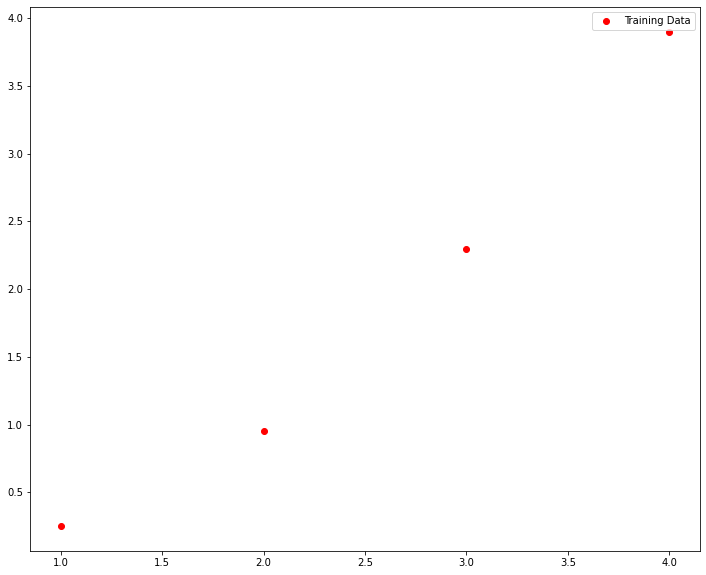

In [3]:
plt.figure(figsize=(12, 10))
plt.plot(xB,yB,"or",label="Training Data")
plt.legend()
plt.show()

Define the positions at wich the function values shall be predicted. In contrast to the GP regression in the [previous section](gp), below we predict numeric values not only at the three locations $5,6$ and $7$, but at all locations in the range from 0 to 7 with a resolution of $0.2$: 

In [4]:
xPred=np.arange(0,7,0.2)

Define the hyperparameters for the mean- and covariance function

In [5]:
c2=0.25 # constant coefficient of quadratic term in prior mean function
ell=1 # horizontal length scale parameter in the squared exponential function
sigmaF2=2 #sigmaF2 is the variance of the multivariate gaussian distribution
sigmaN2=0.005 #sigmaN2 is the variance of the regression noise-term

Definition of mean- and covariance function. Here, the mean function is a quadratic polynomial and the covariance function is the squared exponential.

In [6]:
def priormean(xin):
    return c2*xin**2

def corrFunc(xa,xb):
    return sigmaF2*np.exp(-((xa-xb)**2)/(2.0*ell**2))

Calculate the values *mx* of the mean function in the range from 0 to 7. These values are just used for plotting. The values *mxB* are the mean-function values at the training data x-values, i.e. the **mean-vector**. These values are applied for calculating the prediction. 

In [7]:
mx=priormean(xPred)
mxB=priormean(xB)

Calculate the covariance matrix by evaluating the covariance function at the training data x-values.

In [8]:
KB=np.zeros((len(xB),len(xB)))
for i in range(len(xB)):
    for j in range(i,len(xB)):
        noise=(sigmaN2 if i==j else 0)
        k=corrFunc(xB[i],xB[j])+noise
        KB[i][j]=k
        KB[j][i]=k        
print('-'*10+' Matrix KB '+'-'*10)
print(KB.round(decimals=3))

---------- Matrix KB ----------
[[2.005 1.213 0.271 0.022]
 [1.213 2.005 1.213 0.271]
 [0.271 1.213 2.005 1.213]
 [0.022 0.271 1.213 2.005]]


Calculate the inverse of the covariance matrix

In [9]:
KBInv=np.linalg.inv(KB)
print('-'*10+' Inverse of Matrix KB '+'-'*10)
print(KBInv.round(decimals=3))

---------- Inverse of Matrix KB ----------
[[ 0.953 -0.862  0.519 -0.208]
 [-0.862  1.688 -1.219  0.519]
 [ 0.519 -1.219  1.688 -0.862]
 [-0.208  0.519 -0.862  0.953]]


 Calculate the covariance matrix $K_*$ between training x-values and prediction x-values

In [10]:
Ks=np.zeros((len(xPred),len(xB)))
for i in range(len(xPred)):
    for j in range(len(xB)):
        k=corrFunc(xPred[i],xB[j])
        Ks[i][j]=k
print('-'*10+' Matrix Ks '+'-'*10)
print(Ks.round(decimals=5))

---------- Matrix Ks ----------
[[1.21306 0.27067 0.02222 0.00067]
 [1.4523  0.3958  0.03968 0.00146]
 [1.67054 0.55607 0.06809 0.00307]
 [1.84623 0.75062 0.11227 0.00618]
 [1.9604  0.9735  0.17784 0.01195]
 [2.      1.21306 0.27067 0.02222]
 [1.9604  1.4523  0.3958  0.03968]
 [1.84623 1.67054 0.55607 0.06809]
 [1.67054 1.84623 0.75062 0.11227]
 [1.4523  1.9604  0.9735  0.17784]
 [1.21306 2.      1.21306 0.27067]
 [0.9735  1.9604  1.4523  0.3958 ]
 [0.75062 1.84623 1.67054 0.55607]
 [0.55607 1.67054 1.84623 0.75062]
 [0.3958  1.4523  1.9604  0.9735 ]
 [0.27067 1.21306 2.      1.21306]
 [0.17784 0.9735  1.9604  1.4523 ]
 [0.11227 0.75062 1.84623 1.67054]
 [0.06809 0.55607 1.67054 1.84623]
 [0.03968 0.3958  1.4523  1.9604 ]
 [0.02222 0.27067 1.21306 2.     ]
 [0.01195 0.17784 0.9735  1.9604 ]
 [0.00618 0.11227 0.75062 1.84623]
 [0.00307 0.06809 0.55607 1.67054]
 [0.00146 0.03968 0.3958  1.4523 ]
 [0.00067 0.02222 0.27067 1.21306]
 [0.0003  0.01195 0.17784 0.9735 ]
 [0.00013 0.00618 0.112

Calculate the covariance matrix $K_{**}$ between prediction x-values

In [11]:
Kss=np.zeros((len(xPred),len(xPred)))
for i in range(len(xPred)):
    for j in range(i,len(xPred)):
        noise=(sigmaN2 if i==j else 0)
        k=corrFunc(xPred[i],xPred[j])+noise
        Kss[i][j]=k
        Kss[j][i]=k
print('-'*10+' Matrix Kss '+'-'*10)
print(Kss.round(decimals=3))

---------- Matrix Kss ----------
[[2.005 1.96  1.846 ... 0.    0.    0.   ]
 [1.96  2.005 1.96  ... 0.    0.    0.   ]
 [1.846 1.96  2.005 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 2.005 1.96  1.846]
 [0.    0.    0.    ... 1.96  2.005 1.96 ]
 [0.    0.    0.    ... 1.846 1.96  2.005]]


Calculate the prediction

In [12]:
mus=priormean(xPred)
ypred=mus+np.dot(np.dot(Ks,KBInv),(yB-mxB))
print("Prediction: ",ypred)

Prediction:  [ 0.0607   0.07144  0.09576  0.1329   0.18343  0.24955  0.33491  0.44404
  0.58139  0.75009  0.95099  1.1821   1.43878  1.71466  2.0031   2.29884
  2.59926  2.90502  3.21986  3.54962  3.90082  4.27924  4.68881  5.13106
  5.60528  6.10899  6.63886  7.19143  7.76378  8.35385  8.96053  9.58348
 10.22295 10.87951 11.55381]


Calculate the covariance of the predictions

In [13]:
yvar=np.diag(Kss-np.dot(Ks,np.dot(KBInv,np.transpose(Ks))))
stds=np.sqrt(yvar)
print("Double Standard Deviation: ",2*stds)

Double Standard Deviation:  [2.03145 1.67176 1.25471 0.81683 0.41676 0.19976 0.30632 0.39288 0.36953
 0.2698  0.19958 0.25702 0.32803 0.32803 0.25702 0.19958 0.2698  0.36953
 0.39288 0.30632 0.19976 0.41676 0.81683 1.25471 1.67176 2.03145 2.31537
 2.52119 2.65828 2.74206 2.78897 2.813   2.82426 2.82908 2.83097]


Plot training data and predicitons:

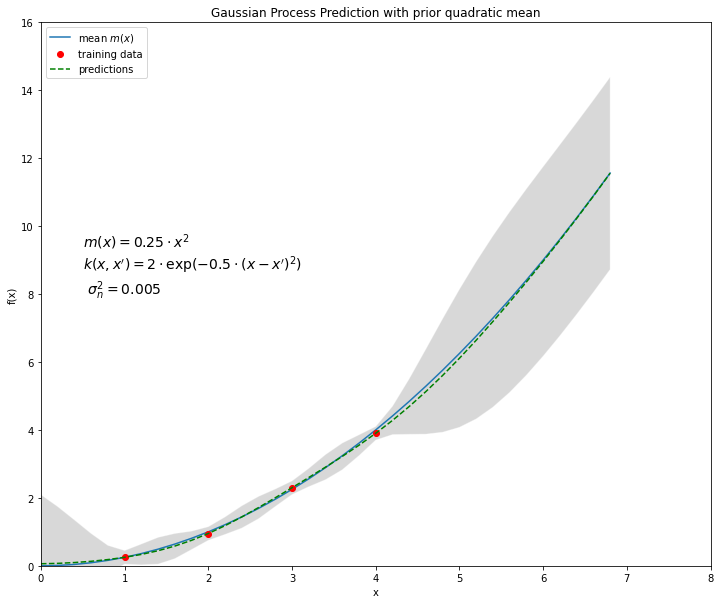

In [14]:
plt.figure(figsize=(12, 10))
plt.plot(xPred,mx,label="mean $m(x)$")
#plt.hold(True)
plt.plot(xB,yB,'or',label="training data")
plt.plot(xPred,ypred,'--g',label="predictions")
plt.text(0.5,8,"$m(x)=0.25 \cdot x^2$ \n$k(x,x')=2 \cdot \exp(-0.5\cdot(x-x')^2)$ \n $\sigma_n^2=0.005$",fontsize=14)
plt.legend(loc=2,numpoints=1)
plt.title('Gaussian Process Prediction with prior quadratic mean')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axis([0,8,0,16])
# plot 2*standard deviation 95%-confidence interval
fillx = r_[xPred, xPred[::-1]]

filly = r_[ypred+2*stds, ypred[::-1]-2*stds[::-1]]
plt.fill(fillx, filly, facecolor='gray', edgecolor='white', alpha=0.3)
plt.show()

## Find optimum hyperparameters for mean- and covariance-function

In [15]:
import numpy as np
from scipy import r_
from matplotlib import pyplot as plt
import scipy.optimize as opt

In [16]:
xB=np.array([1., 3., 5., 6., 7., 8., 9.])
yB=xB*np.sin(xB)

In [17]:
def objective(x): #Returns Log-Likelihood, which must be optimized
    mxB=x[0]*xB**2+x[1]*xB+x[2]+x[6]*xB**3+x[7]*xB**4
    KB=np.zeros((len(xB),len(xB)))
    for i in range(len(xB)):
        for j in range(i,len(xB)):
            noise=x[5]**2
            k=x[3]**2*np.exp(-((xB[i]-xB[j])**2)/(2.0*x[4]**2))+noise
            KB[i][j]=k
            KB[j][i]=k
    KBinv=np.linalg.inv(KB)
    return -1*(-0.5* np.log(np.linalg.det(KB))-0.5 * np.dot(np.transpose(yB-mxB), \
np.dot(KBinv,(yB-mxB)))-2*np.log(2*np.pi))

In [18]:
#Define constraints on the hyperparameters
def constr1(x):
    return x[4]-1 #horizontal length-scale > 1

def constr2(x):
    return 5-x[4] #horizontal length-scale < 5

def constr3(x):
    return x[3]-0.8 #vertical length-scale >0.8

In [19]:
x0=(0.1, 0.01, 0.01, 2.0, 1.0, 0.01,0.01,0.01) #Startvalues for optimization
xopt=opt.fmin_cobyla(objective,x0,cons=[constr1,constr2,constr3])
print('-'*10+"Results of optimisation"+'-'*10)
print(xopt)

----------Results of optimisation----------
[-0.23152 -0.31679 -0.29716  2.66767  1.00007  1.12804  0.00994  0.00263]


In [20]:
#####################Definition of hyperparameters#############################
c4=xopt[7] # constant coefficient of quadratic term in prior mean function
c3=xopt[6] # constant coefficient of quadratic term in prior mean function
c2=xopt[0] # constant coefficient of quadratic term in prior mean function
c1=xopt[1] # constant coefficient of linear term in prior mean function
c0=xopt[2] # constant coefficient constant term in prior mean function
ell=xopt[4] # horicontal length scale parameter in the squared exponential function
sigmaF2=xopt[3]**2 #sigmaF2 is the variance of the multivariate gaussian distribution
sigmaN2=xopt[5]**2 #sigmaN2 is the variance of the regression noise-term

In [21]:
###################Definition of mean- and covariance function################# 
def priormean(xin):
    return c4*xin**4+c3*xin**3+c2*xin**2+c1*xin+c0

def corrFunc(xa,xb):
    return sigmaF2*np.exp(-((xa-xb)**2)/(2.0*ell**2))

In [22]:
x=np.arange(0,10,0.1)
mx=priormean(x)
mxB=priormean(xB)

In [23]:
xPred=np.arange(0,10,0.2)

In [24]:
KB=np.zeros((len(xB),len(xB)))
for i in range(len(xB)):
    for j in range(i,len(xB)):
        noise=(sigmaN2 if i==j else 0)
        k=corrFunc(xB[i],xB[j])+noise
        KB[i][j]=k
        KB[j][i]=k        
print('-'*10+' Matrix KB '+'-'*10)
print(KB.round(decimals=3))

---------- Matrix KB ----------
[[8.389 0.963 0.002 0.    0.    0.    0.   ]
 [0.963 8.389 0.963 0.079 0.002 0.    0.   ]
 [0.002 0.963 8.389 4.317 0.963 0.079 0.002]
 [0.    0.079 4.317 8.389 4.317 0.963 0.079]
 [0.    0.002 0.963 4.317 8.389 4.317 0.963]
 [0.    0.    0.079 0.963 4.317 8.389 4.317]
 [0.    0.    0.002 0.079 0.963 4.317 8.389]]


In [25]:
KBInv=np.linalg.inv(KB)
print('-'*10+' Inverse of Matrix KB '+'-'*10)
print(KBInv.round(decimals=3))

---------- Inverse of Matrix KB ----------
[[ 0.121 -0.014  0.002 -0.001  0.    -0.     0.   ]
 [-0.014  0.123 -0.019  0.01  -0.004  0.001 -0.   ]
 [ 0.002 -0.019  0.173 -0.109  0.042 -0.012  0.002]
 [-0.001  0.01  -0.109  0.239 -0.134  0.049 -0.012]
 [ 0.    -0.004  0.042 -0.134  0.247 -0.134  0.042]
 [-0.     0.001 -0.012  0.049 -0.134  0.238 -0.107]
 [ 0.    -0.     0.002 -0.012  0.042 -0.107  0.17 ]]


In [26]:
Ks=np.zeros((len(xPred),len(xB)))
for i in range(len(xPred)):
    for j in range(len(xB)):
        k=corrFunc(xPred[i],xB[j])
        Ks[i][j]=k
print('-'*10+' Matrix Ks '+'-'*10)
print(Ks.round(decimals=5))

---------- Matrix Ks ----------
[[4.31663 0.0791  0.00003 0.      0.      0.      0.     ]
 [5.16783 0.14127 0.00007 0.      0.      0.      0.     ]
 [5.94431 0.2424  0.00018 0.      0.      0.      0.     ]
 [6.56939 0.39963 0.00045 0.      0.      0.      0.     ]
 [6.97556 0.63301 0.00105 0.00001 0.      0.      0.     ]
 [7.11646 0.96336 0.00239 0.00003 0.      0.      0.     ]
 [6.97556 1.40864 0.00521 0.00007 0.      0.      0.     ]
 [6.56939 1.97897 0.01092 0.00018 0.      0.      0.     ]
 [5.94431 2.67123 0.022   0.00045 0.      0.      0.     ]
 [5.16783 3.46428 0.04256 0.00105 0.00001 0.      0.     ]
 [4.31663 4.31663 0.0791  0.00239 0.00003 0.      0.     ]
 [3.46428 5.16783 0.14127 0.00521 0.00007 0.      0.     ]
 [2.67123 5.94431 0.2424  0.01092 0.00018 0.      0.     ]
 [1.97897 6.56939 0.39963 0.022   0.00045 0.      0.     ]
 [1.40864 6.97556 0.63301 0.04256 0.00105 0.00001 0.     ]
 [0.96336 7.11646 0.96336 0.0791  0.00239 0.00003 0.     ]
 [0.63301 6.97556 1.4086

In [27]:
Kss=np.zeros((len(xPred),len(xPred)))
for i in range(len(xPred)):
    for j in range(i,len(xPred)):
        noise=(sigmaN2 if i==j else 0)
        k=corrFunc(xPred[i],xPred[j])+noise
        Kss[i][j]=k
        Kss[j][i]=k
print('-'*10+' Matrix Kss '+'-'*10)
print(Kss.round(decimals=3))

---------- Matrix Kss ----------
[[8.389 6.976 6.569 ... 0.    0.    0.   ]
 [6.976 8.389 6.976 ... 0.    0.    0.   ]
 [6.569 6.976 8.389 ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 8.389 6.976 6.569]
 [0.    0.    0.    ... 6.976 8.389 6.976]
 [0.    0.    0.    ... 6.569 6.976 8.389]]


In [28]:
mus=priormean(xPred)
ypred=mus+np.dot(np.dot(Ks,KBInv),(yB-mxB))
print("Prediction: ",ypred)

Prediction:  [ 0.40199  0.48549  0.55464  0.60486  0.63423  0.64447  0.64083  0.63064
  0.62056  0.61338  0.60508  0.58337  0.52839  0.41573  0.22127 -0.07333
 -0.4757  -0.97965 -1.56453 -2.19703 -2.8349  -3.43176 -3.9419  -4.32441
 -4.54613 -4.58326 -4.42177 -4.05692 -3.49237 -2.73943 -1.81699 -0.75222
  0.41789  1.645    2.86884  4.01901  5.02012  5.80068  6.30469  6.50396
  6.40789  6.06785  5.57387  5.04363  4.60551  4.37956  4.46071  4.90781
  5.74058  6.94416]


In [29]:
yvar=np.diag(Kss-np.dot(Ks,np.dot(KBInv,np.transpose(Ks))))
stds=np.sqrt(yvar)
print("Double Standard Deviation: ",2*stds)

Double Standard Deviation:  [4.9584  4.55205 4.07582 3.59388 3.21568 3.06549 3.18956 3.49887 3.84304
 4.09708 4.1873  4.09065 3.83298 3.49052 3.18764 3.06328 3.18143 3.47088
 3.79093 4.021   4.09326 3.9941  3.75852 3.45967 3.18729 3.01009 2.93954
 2.93422 2.94404 2.94475 2.93832 2.93396 2.93363 2.93307 2.93044 2.92882
 2.93053 2.93314 2.93363 2.93413 2.93929 2.94707 2.94733 2.9367  2.93976
 3.01327 3.21507 3.5562  3.98941 4.44236]


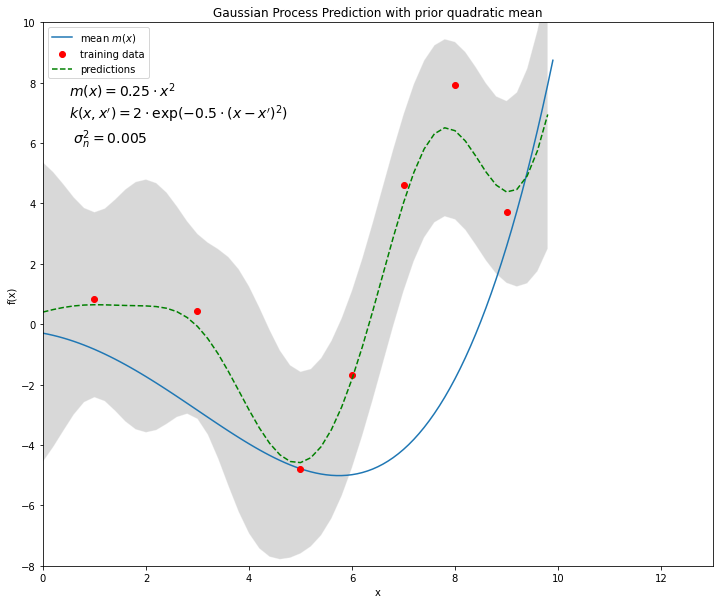

In [30]:
plt.figure(figsize=(12, 10))
plt.plot(x,mx,label="mean $m(x)$")
#plt.hold(True)
plt.plot(xB,yB,'or',label="training data")
plt.plot(xPred,ypred,'--g',label="predictions")
plt.text(0.5,6,"$m(x)=0.25 \cdot x^2$ \n$k(x,x')=2 \cdot \exp(-0.5\cdot(x-x')^2)$ \n $\sigma_n^2=0.005$",fontsize=14)
plt.legend(loc=2,numpoints=1)
plt.title('Gaussian Process Prediction with prior quadratic mean')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axis([0,13,-8,10])
# plot 2*standard deviation 95%-confidence interval
fillx = r_[xPred, xPred[::-1]]

filly = r_[ypred+2*stds, ypred[::-1]-2*stds[::-1]]
plt.fill(fillx, filly, facecolor='gray', edgecolor='white', alpha=0.3)
plt.show()